# TFM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

In [3]:
datos1 = pd.read_csv("/home/michael/Kschool/TFM/Importe_Taxi/2018_Green_Taxi_Trip_Data.csv")

In [4]:
datos1.shape

(8807303, 19)

# Extrayendo muestra

In [5]:
datos1["key"] = range(datos1.shape[0])

In [6]:
from random import sample
total = list(datos1["key"])
muestra = sample(total,round(datos1.shape[0]*0.1))

In [7]:
datos_sample = datos1.loc[muestra]

In [8]:
datos_sample.shape

(880730, 20)

In [9]:
#datos_sample.to_csv("/home/michael/Kschool/TFM/Importe_Taxi/datos_TFM.csv",index = False)

# Limpiando datos

In [9]:
datos_sample["lpep_pickup_datetime"] = pd.to_datetime(datos_sample["lpep_pickup_datetime"])
datos_sample["lpep_dropoff_datetime"] = pd.to_datetime(datos_sample["lpep_dropoff_datetime"])

In [10]:
datos_sample["dayofweek"] = datos_sample["lpep_pickup_datetime"].dt.dayofweek

In [11]:
datos_sample["dayofmonth"] = datos_sample["lpep_pickup_datetime"].dt.day

In [12]:
datos_sample["month"] = datos_sample["lpep_pickup_datetime"].dt.month

In [13]:
datos_sample["hora_pickup"] = datos_sample["lpep_pickup_datetime"].dt.hour * 3600
datos_sample["minute_pickup"] = datos_sample["lpep_pickup_datetime"].dt.minute * 60
datos_sample["second_pickup"] = datos_sample["lpep_pickup_datetime"].dt.second

datos_sample["hora_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.hour * 3600
datos_sample["minute_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.minute * 60
datos_sample["second_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.second

In [14]:
datos_sample["time_pickup"] = datos_sample["hora_pickup"] + datos_sample["minute_pickup"] + datos_sample["second_pickup"]
datos_sample["time_dropoff"] = datos_sample["hora_dropoff"] + datos_sample["minute_dropoff"] + datos_sample["second_dropoff"]

In [15]:
datos_sample["time_duration"] = datos_sample["time_dropoff"] - datos_sample["time_pickup"]

In [16]:
datos_sample["hora_pickup"] = datos_sample["hora_pickup"] / 3600

In [17]:
flag = []
for value in datos_sample["store_and_fwd_flag"]:
    if value == "N":
        flag.append(0)
    else:
        flag.append(1)

datos_sample["store_and_fwd_flag"] = flag

# Limpiando variables

In [18]:
datos_sample["time_duration"].describe()

count    880730.000000
mean        210.078874
std        7599.966621
min      -86377.000000
25%         377.000000
50%         651.000000
75%        1118.000000
max       86160.000000
Name: time_duration, dtype: float64

(array([6.54600e+03, 3.52000e+02, 1.73000e+02, 1.33000e+02, 3.98600e+03,
        8.69429e+05, 2.40000e+01, 1.00000e+00, 2.00000e+00, 8.40000e+01]),
 array([-86377. , -69123.3, -51869.6, -34615.9, -17362.2,   -108.5,
         17145.2,  34398.9,  51652.6,  68906.3,  86160. ]),
 <a list of 10 Patch objects>)

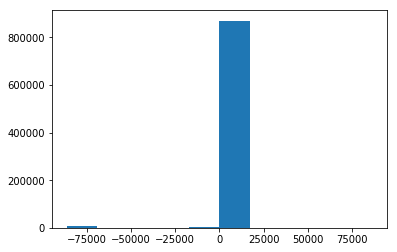

In [19]:
plt.hist(datos_sample["time_duration"])

In [20]:
datos_sample = datos_sample[datos_sample["time_duration"] > 0]

(array([2.42400e+03, 3.80300e+03, 4.83900e+03, 1.95180e+04, 2.11470e+05,
        4.32446e+05, 1.81151e+05, 1.31440e+04, 8.50000e+01, 8.90000e+01]),
 array([ 0.69314718,  1.76022975,  2.82731233,  3.8943949 ,  4.96147748,
         6.02856005,  7.09564262,  8.1627252 ,  9.22980777, 10.29689034,
        11.36397292]),
 <a list of 10 Patch objects>)

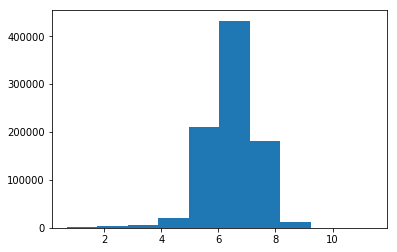

In [21]:
plt.hist(np.log1p(datos_sample["time_duration"]))

In [22]:
datos_sample = datos_sample[datos_sample["time_duration"] > 180]

(array([8.19366e+05, 1.22000e+02, 1.50000e+01, 8.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00, 8.20000e+01]),
 array([  181. ,  8778.9, 17376.8, 25974.7, 34572.6, 43170.5, 51768.4,
        60366.3, 68964.2, 77562.1, 86160. ]),
 <a list of 10 Patch objects>)

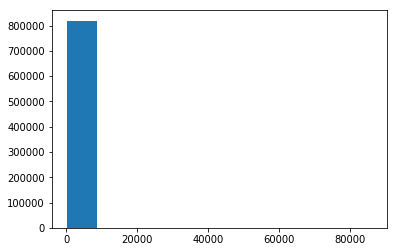

In [23]:
plt.hist((datos_sample["time_duration"]))

In [24]:
datos_sample = datos_sample[datos_sample["time_duration"] <= 7200]

In [25]:
datos_sample["time_duration"].describe()

count    819138.000000
mean        934.955887
std         765.805389
min         181.000000
25%         428.000000
50%         698.000000
75%        1167.000000
max        7197.000000
Name: time_duration, dtype: float64

In [26]:
VendorID = datos_sample.groupby("VendorID")["key"].count().reset_index()
VendorID.columns = ["VendorID","Cantidad"]
VendorID["VendorID"] = VendorID["VendorID"].replace(1,"Tipo_1")
VendorID["VendorID"] = VendorID["VendorID"].replace(2,"Tipo_2")

In [27]:
VendorID

,VendorID,Cantidad
0,Tipo_1,132606
1,Tipo_2,686532


<BarContainer object of 2 artists>

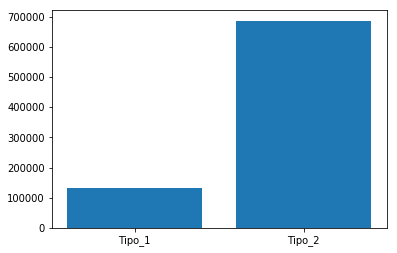

In [28]:
plt.bar(VendorID["VendorID"],VendorID["Cantidad"])

In [29]:
StoreFwdFlag = datos_sample.groupby("store_and_fwd_flag")["key"].count().reset_index()
StoreFwdFlag.columns = ["store_and_fwd_flag","Cantidad"]
StoreFwdFlag["store_and_fwd_flag"] = StoreFwdFlag["store_and_fwd_flag"].replace(0,"N")
StoreFwdFlag["store_and_fwd_flag"] = StoreFwdFlag["store_and_fwd_flag"].replace(1,"Y")

In [30]:
StoreFwdFlag

,store_and_fwd_flag,Cantidad
0,N,817674
1,Y,1464


<BarContainer object of 2 artists>

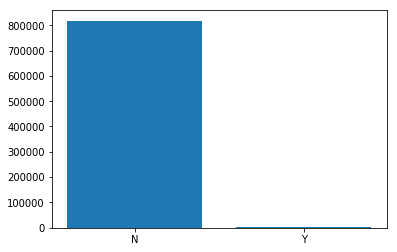

In [31]:
plt.bar(StoreFwdFlag["store_and_fwd_flag"],StoreFwdFlag["Cantidad"])

In [32]:
datos_sample = datos_sample[datos_sample["RatecodeID"] != 99]

In [33]:
RateCodeID = datos_sample.groupby("RatecodeID")["key"].count().reset_index()
RateCodeID.columns = ["RatecodeID","Cantidad"]
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(1,"Tasa Estandar")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(2,"JFK")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(3,"Newark")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(4,"Nassau o Westchester")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(5,"Tarifa Negociada")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(6,"Viaje Grupo")

In [34]:
RateCodeID

,RatecodeID,Cantidad
0,Tasa Estandar,797769
1,JFK,1120
2,Newark,245
3,Nassau o Westchester,577
4,Tarifa Negociada,19427


<BarContainer object of 5 artists>

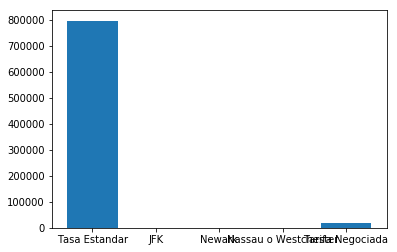

In [35]:
plt.bar(RateCodeID["RatecodeID"],RateCodeID["Cantidad"])

In [36]:
Pasenger = datos_sample.groupby("passenger_count")["key"].count().reset_index()
Pasenger.columns = ["passenger_count","Cantidad"]

In [37]:
Pasenger

,passenger_count,Cantidad
0,0,1082
1,1,693807
2,2,63344
3,3,13334
4,4,4727
5,5,28112
6,6,14720
7,7,6
8,8,4
9,9,2


<BarContainer object of 10 artists>

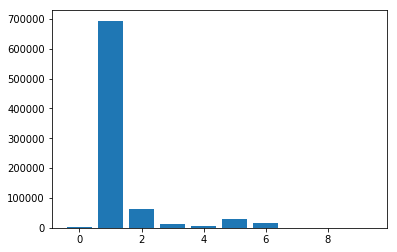

In [38]:
plt.bar(Pasenger["passenger_count"],Pasenger["Cantidad"])

In [39]:
datos_sample["trip_distance"].describe()

count    819138.000000
mean          3.326554
std           3.622116
min           0.000000
25%           1.170000
50%           2.030000
75%           3.960000
max         124.400000
Name: trip_distance, dtype: float64

(array([3.90500e+04, 2.90914e+05, 2.30664e+05, 1.37921e+05, 7.61980e+04,
        3.29080e+04, 1.08880e+04, 5.80000e+02, 1.40000e+01, 1.00000e+00]),
 array([0.        , 0.48315086, 0.96630173, 1.44945259, 1.93260345,
        2.41575431, 2.89890518, 3.38205604, 3.8652069 , 4.34835777,
        4.83150863]),
 <a list of 10 Patch objects>)

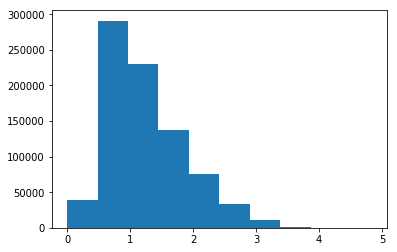

In [40]:
plt.hist(np.log1p(datos_sample["trip_distance"]))

In [41]:
PaymentType = datos_sample.groupby("payment_type")["key"].count().reset_index()
PaymentType.columns = ["payment_type","Cantidad"]
PaymentType["payment_type"] = PaymentType["payment_type"].replace(1,"Tarjeta Credito")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(2,"Efectivo")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(3,"Sin Cargo")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(4,"Disputa")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(5,"Desconocido")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(6,"Viaje Vacio")

In [42]:
PaymentType

,payment_type,Cantidad
0,Tarjeta Credito,474365
1,Efectivo,341557
2,Sin Cargo,2045
3,Disputa,1152
4,Desconocido,19


<BarContainer object of 5 artists>

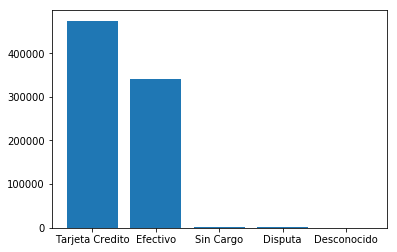

In [43]:
plt.bar(PaymentType["payment_type"],PaymentType["Cantidad"])

In [44]:
DayofWeek = datos_sample.groupby("dayofweek")["key"].count().reset_index()
DayofWeek.columns = ["dayofweek","Cantidad"]
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(0,"Lunes")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(1,"Martes")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(2,"Miercoles")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(3,"Jueves")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(4,"Viernes")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(5,"Sabado")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(6,"Domingo")

In [45]:
DayofWeek

,dayofweek,Cantidad
0,Lunes,107779
1,Martes,111942
2,Miercoles,113926
3,Jueves,119358
4,Viernes,129704
5,Sabado,129824
6,Domingo,106605


<BarContainer object of 7 artists>

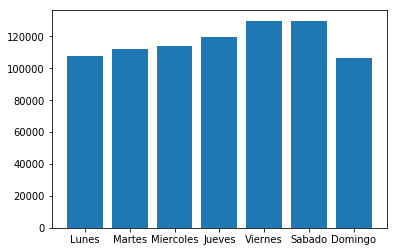

In [46]:
plt.bar(DayofWeek["dayofweek"],DayofWeek["Cantidad"])

In [47]:
DayofMonth = datos_sample.groupby("dayofmonth")["key"].count().reset_index()
DayofMonth.columns = ["dayofmonth","Cantidad"]

<BarContainer object of 31 artists>

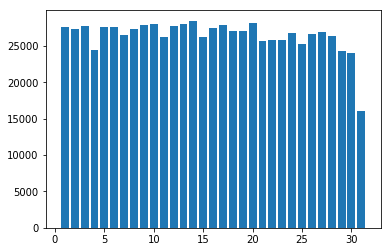

In [48]:
plt.bar(DayofMonth["dayofmonth"],DayofMonth["Cantidad"])

In [49]:
Month = datos_sample.groupby("month")["key"].count().reset_index()
Month.columns = ["month","Cantidad"]

<BarContainer object of 12 artists>

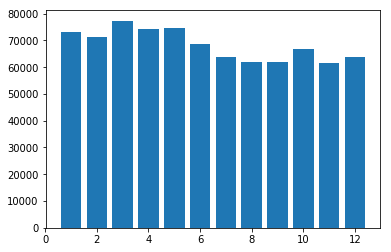

In [50]:
plt.bar(Month["month"],Month["Cantidad"])

In [51]:
Hora = datos_sample.groupby("hora_pickup")["key"].count().reset_index()
Hora.columns = ["hora_pickup","Cantidad"]

<BarContainer object of 24 artists>

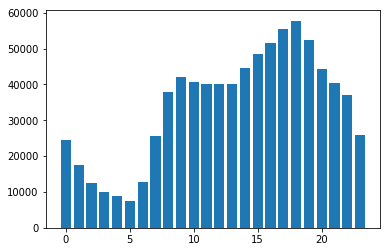

In [52]:
plt.bar(Hora["hora_pickup"],Hora["Cantidad"])

In [53]:
datos_sample["total_amount"].describe()

count    819138.000000
mean         16.199835
std          12.168248
min        -110.000000
25%           8.760000
50%          12.300000
75%          19.300000
max         787.840000
Name: total_amount, dtype: float64

(array([1.60000e+01, 8.13518e+05, 5.55300e+03, 4.40000e+01, 6.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-110.   ,  -20.216,   69.568,  159.352,  249.136,  338.92 ,
         428.704,  518.488,  608.272,  698.056,  787.84 ]),
 <a list of 10 Patch objects>)

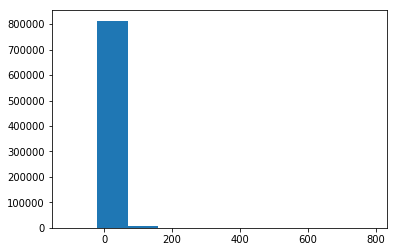

In [54]:
plt.hist(datos_sample["total_amount"])

In [55]:
datos_sample = datos_sample[datos_sample["total_amount"] > 0]

(array([4.50000e+01, 2.10000e+01, 5.72530e+04, 4.03900e+05, 2.50335e+05,
        8.82870e+04, 1.71690e+04, 3.90000e+02, 7.00000e+00, 1.00000e+00]),
 array([0.00995033, 0.67601165, 1.34207297, 2.00813429, 2.6741956 ,
        3.34025692, 4.00631824, 4.67237956, 5.33844088, 6.00450219,
        6.67056351]),
 <a list of 10 Patch objects>)

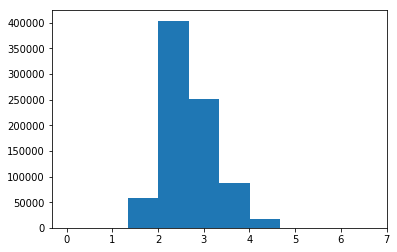

In [56]:
plt.hist(np.log1p(datos_sample["total_amount"]))

In [57]:
datos_sample = datos_sample[datos_sample["total_amount"] >= 5]

(array([8.12953e+05, 1.73000e+03, 3.80000e+01, 5.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  5.   ,  83.284, 161.568, 239.852, 318.136, 396.42 , 474.704,
        552.988, 631.272, 709.556, 787.84 ]),
 <a list of 10 Patch objects>)

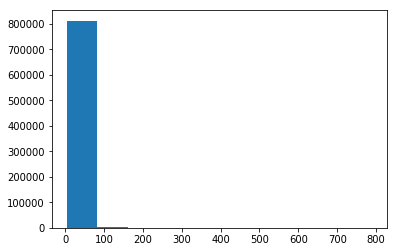

In [58]:
plt.hist((datos_sample["total_amount"]))

In [59]:
datos_sample = datos_sample[datos_sample["total_amount"] <= 120]

# Seleccionando variables

In [60]:
datos_sample2 = datos_sample[["key","VendorID","store_and_fwd_flag","RatecodeID","PULocationID","DOLocationID","passenger_count","trip_distance",
                              "payment_type","trip_type","total_amount","hora_pickup","dayofweek","dayofmonth","month","time_duration"]]
#"borough_pickup","borough_dropoff","zone_pickup","zone_dropoff"

In [61]:
datos_sample2.isnull().sum()

key                   0
VendorID              0
store_and_fwd_flag    0
RatecodeID            0
PULocationID          0
DOLocationID          0
passenger_count       0
trip_distance         0
payment_type          0
trip_type             0
total_amount          0
hora_pickup           0
dayofweek             0
dayofmonth            0
month                 0
time_duration         0
dtype: int64

In [62]:
datos_sample2.shape

(814521, 16)

# Escalando variables

In [63]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

In [64]:
datos_sample2.columns

Index(['key', 'VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'payment_type',
       'trip_type', 'total_amount', 'hora_pickup', 'dayofweek', 'dayofmonth',
       'month', 'time_duration'],
      dtype='object')

In [65]:
datos_sample2["key"] = range(datos_sample2.shape[0])

/home/michael/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
X_num = datos_sample2.drop(["key","time_duration","total_amount"],axis = 1)
X_scaled = rbs.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', "trip_distance", 'payment_type',
                    'trip_type', 'hora_pickup', 'dayofweek', 'dayofmonth', 'month']

In [67]:
X_scaled["key1"] = range(X_scaled.shape[0])
X = X_scaled
y = datos_sample2["time_duration"]

# target

(array([5.05684e+05, 1.91948e+05, 6.69770e+04, 2.71990e+04, 1.23080e+04,
        5.76700e+03, 2.65500e+03, 1.21100e+03, 5.32000e+02, 2.40000e+02]),
 array([ 181. ,  882.6, 1584.2, 2285.8, 2987.4, 3689. , 4390.6, 5092.2,
        5793.8, 6495.4, 7197. ]),
 <a list of 10 Patch objects>)

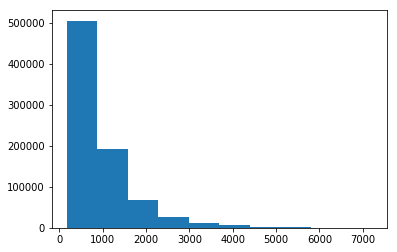

In [68]:
plt.hist(y)

# Particion train-test

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [70]:
Val_train = pd.DataFrame(X_train["key1"])
Val_test = pd.DataFrame(X_test["key1"])
X_train = X_train.drop("key1",axis = 1)
X_test = X_test.drop("key1",axis = 1)

In [71]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((570164, 13), (570164,), (244357, 13), (244357,))

# Comparacion de Modelos

**Modelo Regresion Lineal**

In [72]:
from sklearn.linear_model import LinearRegression
rl = LinearRegression()

In [73]:
mod_rl = rl.fit(X_train,y_train)

In [74]:
pred_rl = mod_rl.predict(X_test)

**Metricas**

In [75]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_rl),mean_squared_error(y_test,pred_rl)**(0.5)

(186501.48684134806, 431.8581790835367)

In [76]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_rl)

276.554798225868

In [77]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_rl)

36.28626748156083

In [78]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test(y_test,pred_rl)

0.8251936218667638

**Modelo Lasso**

In [79]:
from sklearn.linear_model import Lasso
lasso_ = Lasso(alpha = 0.001)

In [80]:
mod_lasso = lasso_.fit(X_train,y_train)

In [81]:
pred_lasso = mod_lasso.predict(X_test)

**Metricas**

In [82]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_lasso),mean_squared_error(y_test,pred_lasso)**(0.5)

(186501.6212771757, 431.858334731629)

In [83]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_lasso)

276.5547139858097

In [84]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_lasso)

36.28632065552905

In [85]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test(y_test,pred_lasso)

0.8251934869737487

**Modelo Rigde**

In [86]:
from sklearn.linear_model import Ridge
ridge_ = Ridge(alpha = 10000)

In [87]:
mod_ridge = ridge_.fit(X_train,y_train)

In [88]:
pred_ridge = mod_ridge.predict(X_test)

**Metricas**

In [89]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_ridge),mean_squared_error(y_test,pred_ridge)**(0.5)

(186709.05648246757, 432.0984337884917)

In [90]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_ridge)

277.3942220987212

In [91]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_ridge)

36.65618282642852

In [92]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test(y_test,pred_ridge)

0.8250438966013076

**Modelo GBM**

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

In [94]:
mod_gbm = gbm.fit(X_train,y_train)

In [95]:
pred_gbm = mod_gbm.predict(X_test)

**Metricas**

In [96]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_gbm),mean_squared_error(y_test,pred_gbm)**(0.5)

(130782.09378552488, 361.6380701551274)

In [97]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_gbm)

219.1266322319562

In [98]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_gbm)

25.089616280239994

In [99]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test((y_test),(pred_gbm))

0.8813531772697164

**Modelo RandomForest**

In [100]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [101]:
mod_rf = rf.fit(X_train,y_train)

/home/michael/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [102]:
pred_rf = mod_rf.predict(X_test)

**Metricas**

In [103]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_rf),mean_squared_error(y_test,pred_rf)**(0.5)

(123124.91042701606, 350.89159355421447)

In [104]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_rf)

211.39875847925077

In [105]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_rf)

24.07336522268841

In [106]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test((y_test),(pred_rf))

0.8891056979269993

# Importancia de variables

In [107]:
feature_importances = pd.DataFrame(mod_rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

In [108]:
feature_importances

,importance
trip_distance,0.746560
hora_pickup,0.062327
DOLocationID,0.053854
PULocationID,0.043109
dayofmonth,0.029485
dayofweek,0.023346
month,0.023260
passenger_count,0.005911
payment_type,0.005052
VendorID,0.003307


# Revisando predicciones

In [109]:
Val_train.columns = ["key"]
Val_test.columns = ["key"]

datos_sample_train = datos_sample2.merge(Val_train)
datos_sample_test = datos_sample2.merge(Val_test)

In [110]:
datos_sample_train.shape,datos_sample_test.shape

((570164, 16), (244357, 16))

In [111]:
datos_sample_test["pred_time_duration"] = (pred_rf)

# rankeo Predicciones

In [112]:
np.percentile(datos_sample_test["pred_time_duration"], np.arange(0, 100, 10)) # deciles

array([ 188.5 ,  329.2 ,  413.12,  504.7 ,  608.3 ,  727.9 ,  877.2 ,
       1075.8 , 1357.9 , 1858.74])

In [113]:
range_pred_duration = []
for value in datos_sample_test["pred_time_duration"]:
    if value <= 320:
        range_pred_duration.append("1.[0 - 329]")
    elif value <= 400:
        range_pred_duration.append("2.[330 - 413]")
    elif value <= 485:
        range_pred_duration.append("3.[414 - 503]")
    elif value <= 585:
        range_pred_duration.append("4.[504 - 608]")
    elif value <= 700:
        range_pred_duration.append("5.[609 - 730]")
    elif value <= 850:
        range_pred_duration.append("6.[731 - 883]")
    elif value <= 1035:
        range_pred_duration.append("7.[884 - 1080]")
    elif value <= 1300:
        range_pred_duration.append("8.[1081 - 1362]")
    elif value <= 1780:
        range_pred_duration.append("9.[1363 - 1868]")
    else:
        range_pred_duration.append("10.[1869 - Mas]")

datos_sample_test["range_pred_time_duration"] = range_pred_duration

# calidad predicciones

In [114]:
datos_sample_test["range_dif"] = np.abs(datos_sample_test["time_duration"] - datos_sample_test["pred_time_duration"])

In [115]:
datos_sample_test["perc_dif"] = datos_sample_test["range_dif"] / datos_sample_test["time_duration"]

In [117]:
datos_sample_test["perc_dif"].describe()

count    244357.000000
mean          1.078720
std           1.583013
min           0.000000
25%           0.303770
50%           0.594788
75%           1.029749
max          27.919149
Name: perc_dif, dtype: float64

# Graficando las zonas

In [121]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps

/usr/local/lib/python3.6/dist-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [122]:
import shapefile as shp

sf = shp.Reader("/home/michael/Kschool/TFM/Importe_Taxi/taxi_zones/taxi_zones.shp")

In [123]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [124]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

In [125]:
import seaborn as sns

def calc_color(data, color=None):
    if color   == 1: 
        color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0', '#807dbaF0','#6a51a3F0','#54278fF0']; 
        colors = 'Purples';
    elif color == 2:
        color_sq = ['#c7e9b4','#7fcdbb','#41b6c4', '#1d91c0','#225ea8','#253494']; 
        colors = 'YlGnBu';
    elif color == 3: 
        color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd', '#969696','#636363','#252525']; 
        colors = 'Greys';
    elif color == 9: 
        color_sq = ['#ff0000','#ff0000','#ff0000', '#ff0000','#ff0000','#ff0000']
    else:
        color_sq = ['#ffffd4','#fee391','#fec44f', '#fe9929','#d95f0e','#993404'];        
        colors = 'YlOrBr';
    new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))
    color_ton = []
    for val in new_data:
        color_ton.append(color_sq[val]) 
    if color != 9:
        colors = sns.color_palette(colors, n_colors=6)
        sns.palplot(colors, 0.6);
    for i in range(6):
        print ("\n"+str(i+1)+': '+str(int(bins[i]))+" => "+str(int(bins[i+1])-1), end =" ")
        print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [126]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [127]:
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    comuna_id = []
    for i in comunas:
        comuna_id.append(df[df.zone == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [128]:
df = read_shapefile(sf)

In [147]:
df_location = datos_sample_test.groupby("PULocationID")["total_amount"].sum().reset_index()
df_location.columns = ["LocationID","total_amount"]

In [148]:
df = df.merge(df_location)


1: 6 => 117 

   1   2   3   4   5   6


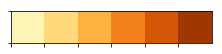

<Figure size 792x648 with 0 Axes>

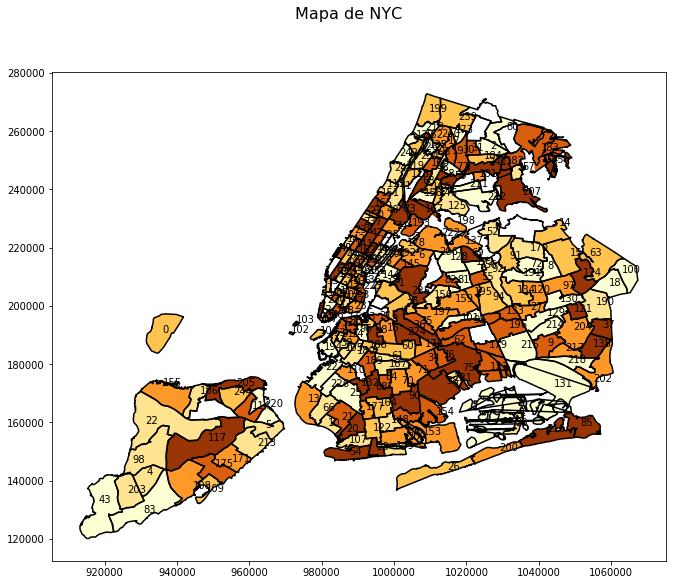

In [149]:
title = "Mapa de NYC"
names = list(df["zone"])
data = list(df["total_amount"])

plot_comunas_data(sf,title,names, data, 5, True)

# Top 10 zonas con mas recaudacion de dinero

In [132]:
df.sort_values("total_amount",ascending = False).head(10)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,coords,total_amount
67,74,0.110291,0.000295,East Harlem North,74,Manhattan,"[(1002572.2760010064, 236761.57440185547), (10...",212014.22
68,75,0.087664,0.000241,East Harlem South,75,Manhattan,"[(1000577.174697876, 228028.552730456), (10012...",194761.06
36,41,0.052793,0.000143,Central Harlem,41,Manhattan,"[(998716.9128961712, 234240.39717498422), (999...",164261.18
75,82,0.119876,0.000324,Elmhurst,82,Queens,"[(1020914.1317107975, 210389.71388940513), (10...",138152.39
3,7,0.107417,0.000390,Astoria,7,Queens,"[(1010804.2179628164, 218919.64069513977), (10...",137885.69
152,166,0.068824,0.000255,Morningside Heights,166,Manhattan,"[(996131.212920785, 235950.77747422457), (9963...",133433.12
225,244,0.080569,0.000360,Washington Heights South,244,Manhattan,"[(1000658.6903420687, 249440.20533962548), (10...",109453.08
28,33,0.053270,0.000147,Brooklyn Heights,33,Brooklyn,"[(985305.7563099563, 195535.75502961874), (985...",109168.54
90,97,0.062476,0.000163,Fort Greene,97,Brooklyn,"[(992751.6986956745, 192765.1403606385), (9928...",105384.43
37,42,0.092709,0.000264,Central Harlem North,42,Manhattan,"[(1002413.1913817227, 243934.56038284302), (10...",103907.82


# Revisando el tiempo de duracion de las 5 zonas que mas recaudan

**1**

In [160]:
amount_max = datos_sample_test[datos_sample_test["PULocationID"] == 74]

amount_max_a = amount_max.groupby("DOLocationID")[["total_amount"]].sum().reset_index().sort_values("total_amount",ascending = False)
amount_max_m = amount_max.groupby("DOLocationID")[["total_amount","time_duration","pred_time_duration"]].median().reset_index()
amount_max_m.columns = ["DOLocationID","amount_median","time_duration_median","pred_time_duration_median"]
amount_max_m["time_duration_median"] = amount_max_m["time_duration_median"] / 60
amount_max_m["pred_time_duration_median"] = amount_max_m["pred_time_duration_median"] / 60

amount_max_f = amount_max_a.merge(amount_max_m)
amount_max_f.head(10)

,DOLocationID,total_amount,amount_median,time_duration_median,pred_time_duration_median
0,75,17232.00,8.30,6.975000,12.310833
1,236,13288.92,11.80,10.833333,12.020000
2,41,12523.84,7.80,6.666667,11.926667
3,42,11840.45,8.80,7.666667,12.558333
4,166,11016.48,11.30,11.283333,11.950000
5,263,10706.53,12.30,10.750000,12.741667
6,74,9243.05,6.80,5.316667,11.804167
7,238,7200.93,15.30,15.016667,12.788333
8,239,6002.64,16.80,16.866667,11.525000
9,151,5810.25,12.96,13.025000,11.784167


**2**

In [161]:
amount_max = datos_sample_test[datos_sample_test["PULocationID"] == 75]

amount_max_a = amount_max.groupby("DOLocationID")[["total_amount"]].sum().reset_index().sort_values("total_amount",ascending = False)
amount_max_m = amount_max.groupby("DOLocationID")[["total_amount","time_duration","pred_time_duration"]].median().reset_index()
amount_max_m.columns = ["DOLocationID","amount_median","time_duration_median","pred_time_duration_median"]
amount_max_m["time_duration_median"] = amount_max_m["time_duration_median"] / 60
amount_max_m["pred_time_duration_median"] = amount_max_m["pred_time_duration_median"] / 60

amount_max_f = amount_max_a.merge(amount_max_m)
amount_max_f.head(10)

,DOLocationID,total_amount,amount_median,time_duration_median,pred_time_duration_median
0,74,19445.82,7.820,5.550000,11.852500
1,75,8605.15,7.200,5.483333,12.230000
2,236,8331.39,8.160,6.333333,11.351667
3,41,8155.17,8.760,6.933333,12.175000
4,42,7863.92,11.300,10.050000,12.460000
5,263,6858.02,8.800,7.000000,11.863333
6,238,6771.18,9.800,7.716667,12.216667
7,237,5361.66,12.300,11.466667,12.434167
8,166,4541.75,11.370,10.825000,12.230833
9,141,3891.79,12.355,11.716667,12.854167


**3**

In [162]:
amount_max = datos_sample_test[datos_sample_test["PULocationID"] == 41]

amount_max_a = amount_max.groupby("DOLocationID")[["total_amount"]].sum().reset_index().sort_values("total_amount",ascending = False)
amount_max_m = amount_max.groupby("DOLocationID")[["total_amount","time_duration","pred_time_duration"]].median().reset_index()
amount_max_m.columns = ["DOLocationID","amount_median","time_duration_median","pred_time_duration_median"]
amount_max_m["time_duration_median"] = amount_max_m["time_duration_median"] / 60
amount_max_m["pred_time_duration_median"] = amount_max_m["pred_time_duration_median"] / 60

amount_max_f = amount_max_a.merge(amount_max_m)
amount_max_f.head(10)

,DOLocationID,total_amount,amount_median,time_duration_median,pred_time_duration_median
0,42,19034.76,7.80,5.933333,11.981667
1,74,14208.62,8.16,6.916667,12.145833
2,41,8303.15,6.80,4.683333,12.103333
3,166,7710.64,7.88,6.316667,12.471667
4,75,6363.52,8.80,8.216667,12.283333
5,116,6103.65,10.30,9.050000,12.048333
6,238,4851.96,10.80,9.700000,11.850000
7,244,4838.52,14.75,14.683333,12.410000
8,152,3992.79,8.30,7.033333,12.358333
9,151,3847.24,9.12,7.616667,12.075000


**4**

In [163]:
amount_max = datos_sample_test[datos_sample_test["PULocationID"] == 82]

amount_max_a = amount_max.groupby("DOLocationID")[["total_amount"]].sum().reset_index().sort_values("total_amount",ascending = False)
amount_max_m = amount_max.groupby("DOLocationID")[["total_amount","time_duration","pred_time_duration"]].median().reset_index()
amount_max_m.columns = ["DOLocationID","amount_median","time_duration_median","pred_time_duration_median"]
amount_max_m["time_duration_median"] = amount_max_m["time_duration_median"] / 60
amount_max_m["pred_time_duration_median"] = amount_max_m["pred_time_duration_median"] / 60

amount_max_f = amount_max_a.merge(amount_max_m)
amount_max_f.head(10)

,DOLocationID,total_amount,amount_median,time_duration_median,pred_time_duration_median
0,129,20297.70,9.300,8.366667,12.260833
1,82,12892.73,8.300,7.733333,11.906667
2,138,8044.84,15.800,11.283333,12.395833
3,56,7740.44,9.325,9.191667,11.804167
4,173,6144.30,9.800,10.416667,12.318333
5,260,5774.27,9.300,8.966667,11.975000
6,226,4958.97,13.300,13.566667,11.733333
7,70,4217.40,13.300,11.683333,11.923333
8,157,4032.70,10.300,9.291667,12.069167
9,95,3998.31,11.800,11.425000,11.989167


**5**

In [164]:
amount_max = datos_sample_test[datos_sample_test["PULocationID"] == 7]

amount_max_a = amount_max.groupby("DOLocationID")[["total_amount"]].sum().reset_index().sort_values("total_amount",ascending = False)
amount_max_m = amount_max.groupby("DOLocationID")[["total_amount","time_duration","pred_time_duration"]].median().reset_index()
amount_max_m.columns = ["DOLocationID","amount_median","time_duration_median","pred_time_duration_median"]
amount_max_m["time_duration_median"] = amount_max_m["time_duration_median"] / 60
amount_max_m["pred_time_duration_median"] = amount_max_m["pred_time_duration_median"] / 60

amount_max_f = amount_max_a.merge(amount_max_m)
amount_max_f.head(10)

,DOLocationID,total_amount,amount_median,time_duration_median,pred_time_duration_median
0,7,20463.78,7.300,5.283333,11.793333
1,223,14767.83,9.300,8.233333,12.438333
2,179,9997.96,8.155,6.533333,12.067500
3,129,7731.39,11.800,11.350000,11.883333
4,226,6650.51,9.350,8.633333,12.771667
5,260,5678.48,9.800,8.866667,13.473333
6,146,4474.58,8.300,6.741667,11.316667
7,193,3899.86,8.800,7.583333,12.158333
8,82,3621.83,15.800,17.166667,12.415000
9,145,3419.25,11.800,11.158333,11.986667
